*Installing yfinance*

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 6.2 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import yfinance as yf
print(yf.__version__)

0.1.70


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df_ice_cream=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tensorflow-Certificate/C4/W1/ice_cream.csv')
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [6]:
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)
df_ice_cream["date"]=pd.to_datetime(df_ice_cream.date)

In [7]:
df_ice_cream.set_index('date',inplace=True)

In [8]:
df_ice_cream.head()

,production
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [9]:
#just get the data 2010 onwards
start_date=pd.to_datetime('2010-01-01')
df_ice_cream=df_ice_cream[start_date:]

In [10]:
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


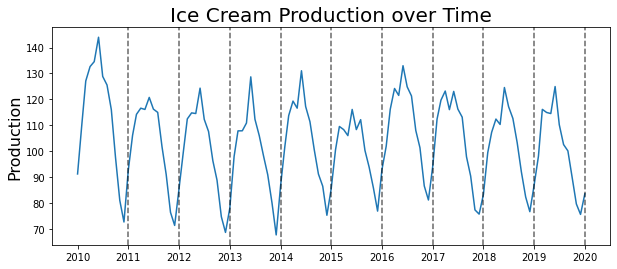

In [37]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
   plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='black', linestyle='--', alpha=0.6)

# ACF

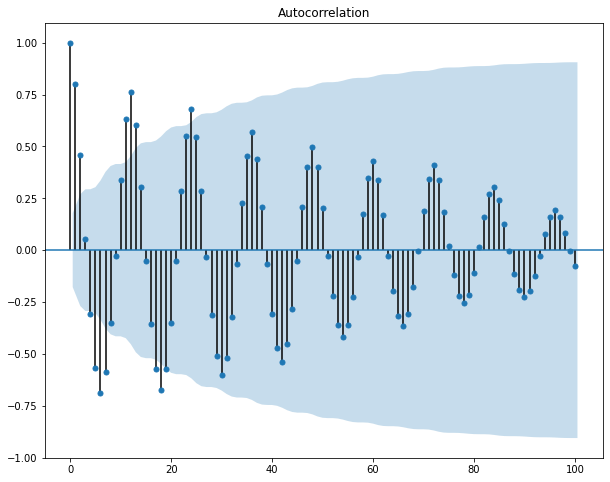

In [23]:
x, y = 10, 8
fig, ax = plt.subplots(figsize=(x, y))
acf_plot=plot_acf(df_ice_cream.production,lags=100,ax=ax)

# PACF

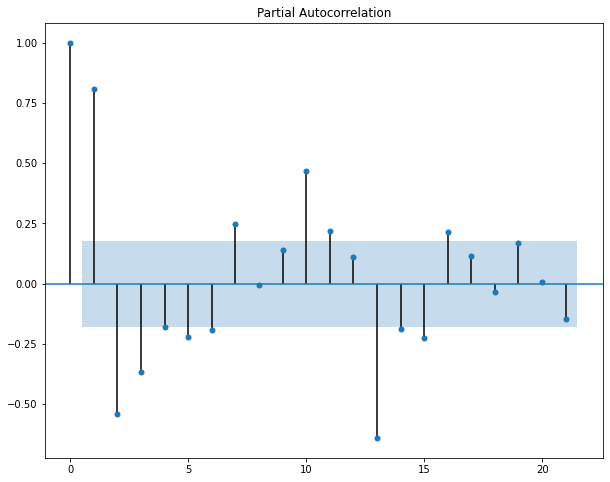

In [25]:
fig, ax = plt.subplots(figsize=(x, y))
pacf_plot=plot_pacf(df_ice_cream.production,ax=ax)

## Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

# On stock data

In [50]:
ticker_symbol='SPY'
#get data on this ticker
tickerData = yf.Ticker(ticker_symbol)

In [51]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')#pandas dataframe

In [52]:
tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,181.176647,181.615586,179.245303,180.342651,121465900,0.0,0
2015-01-05,179.236540,179.412113,176.760928,177.085739,169632600,0.0,0
2015-01-06,177.410561,177.963629,174.575016,175.417786,209151400,0.0,0
2015-01-07,176.822372,177.963617,176.348323,177.603683,125346700,0.0,0
2015-01-08,179.096059,180.983506,179.078511,180.755249,147217800,0.0,0


In [53]:
tickerDf=tickerDf[['Close']]

In [46]:
tickerDf.head()

,Close
Date,
2015-01-02,180.342667
2015-01-05,177.085739
2015-01-06,175.417786
2015-01-07,177.603699
2015-01-08,180.755264


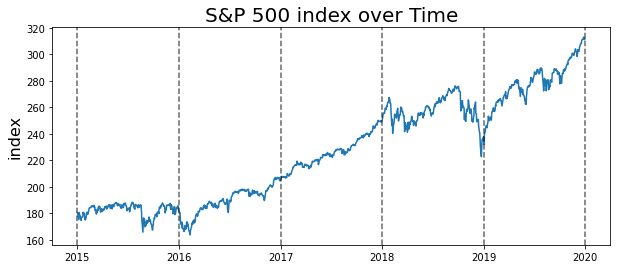

In [47]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('S&P 500 index over Time', fontsize=20)
plt.ylabel('index', fontsize=16)
for year in range(2015,2021):
   plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='black', linestyle='--', alpha=0.6)

### Stationarity: take first difference of this series

In [54]:
first_diff=tickerDf['Close'].values[1:]-tickerDf['Close'].values[:-1]
first_diff=np.concatenate([first_diff,[0]])  #we add 0 because the last first difference is between the last day and itself so it's 0


In [56]:
print(type(first_diff))
tickerDf['first_difference']=first_diff
tickerDf.head()


<class 'numpy.ndarray'>


,Close,first_difference
Date,,
2015-01-02,180.342651,-3.256912
2015-01-05,177.085739,-1.667953
2015-01-06,175.417786,2.185898
2015-01-07,177.603683,3.151566
2015-01-08,180.755249,-1.448486


In [59]:
print(len(tickerDf['first_difference']))
print(first_diff)

1258
[-3.25691223 -1.66795349  2.18589783 ... -1.72439575  0.75567627
  0.        ]


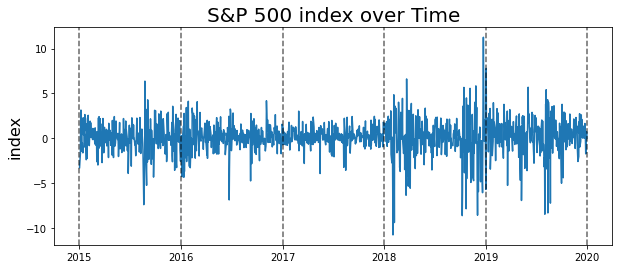

In [60]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf['first_difference'])
plt.title('S&P 500 index over Time', fontsize=20)
plt.ylabel('index', fontsize=16)
for year in range(2015,2021):
   plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='black', linestyle='--', alpha=0.6)

# ACF

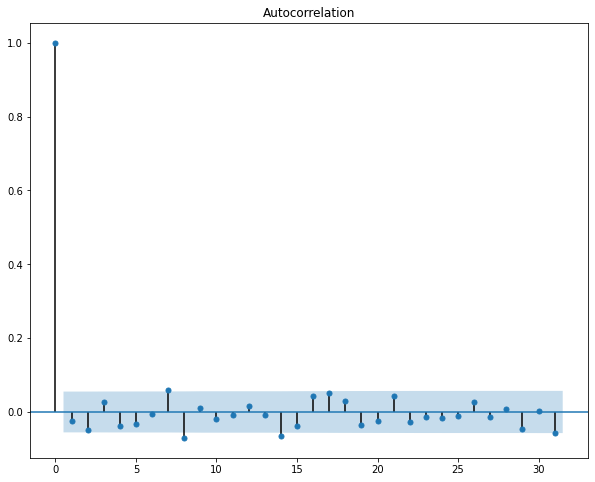

In [62]:
x, y = 10, 8
fig, ax = plt.subplots(figsize=(x, y))
acf_plot=plot_acf(tickerDf['first_difference'],ax=ax)

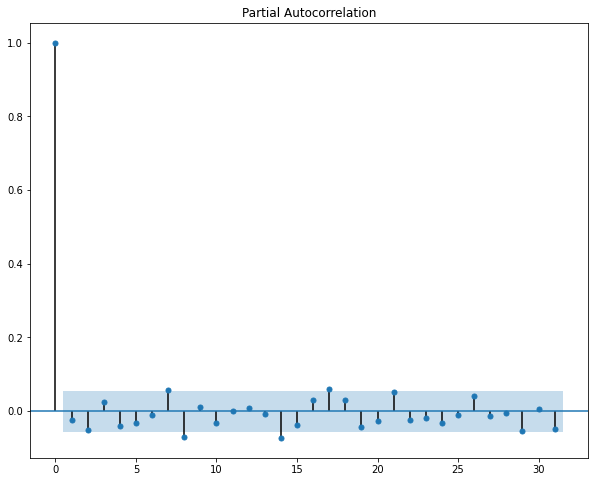

In [63]:
x, y = 10, 8
fig, ax = plt.subplots(figsize=(x, y))
pacf_plot=plot_pacf(tickerDf['first_difference'],ax=ax)

**As we can see both plots aren't informative given that most of the lags are within the error band**